In [60]:
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('train 2.csv')

In [62]:
var_holder = {}     #creating separate dataframe for each item

for i in range(1,51):
    var_holder['item' + str(i)] = df[df['item']==i]
    
locals().update(var_holder)

In [63]:
df1 = pd.DataFrame(item1.groupby('date')['sales'].sum())  #taking item1

In [64]:
df1.reset_index(level=0,inplace=True)

In [65]:
df1['date'] =  pd.to_datetime(df1['date'])

In [66]:
var_holder = {}     #sales sum for next 90 days
 
for i in range(len(df1)):
    if len(df1[i:i+90]) ==90:
        var_holder[df1['date'][i]] = df1['sales'][i:(i+90)].sum()
    
locals().update(var_holder)

In [67]:
df2 = pd.DataFrame.from_dict(var_holder,orient ='index') #converting to dataframe from dict

In [68]:
df2.head()

,0
2013-01-01,12847
2013-01-02,12848
2013-01-03,12936
2013-01-04,13019
2013-01-05,13103


In [69]:
df2.reset_index(level=0,inplace=True)

In [70]:
df2.columns = ['date','aggregated_sum_for_3months']

In [71]:
df2['year'] = pd.DatetimeIndex(df2['date']).year

In [72]:
df2['month'] = pd.DatetimeIndex(df2['date']).month

In [73]:
df2.head()

,date,aggregated_sum_for_3months,year,month
0,2013-01-01,12847,2013,1
1,2013-01-02,12848,2013,1
2,2013-01-03,12936,2013,1
3,2013-01-04,13019,2013,1
4,2013-01-05,13103,2013,1


In [74]:
df2.shape

(1737, 4)

In [75]:
x = df2.iloc[:1461,2:]  #training values

In [76]:
x.tail()

,year,month
1456,2016,12
1457,2016,12
1458,2016,12
1459,2016,12
1460,2016,12


In [77]:
y = df2.iloc[:1461,1:2]     #training values

In [78]:
x_test = df2.iloc[1461:,2:] #test values

In [79]:
y_test = df2.iloc[1461:,1:2] #test values

In [80]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x, y)

In [81]:
y_pred = reg.predict(x_test)

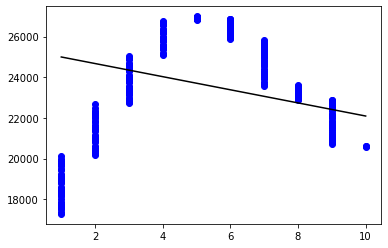

In [82]:
plt.scatter(df2.month[1461:],y_test, color ='b')
plt.plot(df2.month[1461:],y_pred, color ='k')

plt.show()

In [83]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.3f' % mae)

MAE: 2369.990
